In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

#### File Reading

In [3]:
csvFileLocation = 'data/targetfirm_prediction_dataset_small.csv'

In [4]:
finance_dataframe = pd.read_csv(csvFileLocation)

In [5]:
finance_dataframe.head()

,Unnamed: 0,gvkey,fyear,target,at,revt,ib,ca,capx,ceq,che,emp,invt,re,xrd,dltt,dv,sic
0,6,1004,2000.0,0.0,701.854,874.255,18.531,NaN,13.134,340.212,13.809,2.5,320.590,204.065,NaN,179.987,9.157,5080.0
1,7,1004,2001.0,0.0,710.199,638.721,-58.939,NaN,12.112,310.235,34.522,2.2,286.588,139.603,NaN,217.699,4.430,5080.0
2,8,1004,2002.0,0.0,686.621,606.337,-12.410,NaN,9.930,294.988,29.154,2.1,259.954,124.106,NaN,164.658,0.797,5080.0
3,9,1004,2003.0,0.0,709.292,651.958,3.504,NaN,10.286,301.684,41.010,2.3,247.245,131.884,NaN,248.666,0.000,5080.0
4,10,1004,2004.0,0.0,732.230,747.848,18.572,NaN,13.033,314.744,50.338,2.6,255.477,142.450,NaN,227.159,0.000,5080.0


#### Data Cleaning

In [6]:
finance_dataframe.isna().sum()

Unnamed: 0         0
gvkey              0
fyear              0
target             0
at             34635
revt           35677
ib             35660
ca            211399
capx           63184
ceq            35063
che            57076
emp            63859
invt           53353
re             40548
xrd           150287
dltt           35036
dv             65058
sic                3
dtype: int64

In [7]:
# # dropping columns which contains more than 60% NaN values.

# columns = finance_dataframe.columns
# for col in columns:
#     if finance_dataframe[col].isna().sum() >= len(finance_dataframe)*0.6:
#         finance_dataframe.drop(columns=[col], inplace=True)

In [8]:
finance_dataframe.fillna(0,inplace=True)

In [9]:
finance_dataframe.isna().sum()

Unnamed: 0    0
gvkey         0
fyear         0
target        0
at            0
revt          0
ib            0
ca            0
capx          0
ceq           0
che           0
emp           0
invt          0
re            0
xrd           0
dltt          0
dv            0
sic           0
dtype: int64

In [10]:
# for features not using Unnamed: 0, gvkey, fyear and no target
finance_features = finance_dataframe.iloc[:,3:len(finance_dataframe.columns)]

#### Data Visualization

In [11]:
finance_features.corr()

,target,at,revt,ib,ca,capx,ceq,che,emp,invt,re,xrd,dltt,dv,sic
target,1.000000,0.007956,0.012633,0.009578,-0.001701,-0.000295,0.013463,0.007151,0.004641,0.002051,0.010845,0.000005,0.001124,0.001559,0.018790
at,0.007956,1.000000,0.475869,0.361056,0.197135,0.155549,0.611279,0.606885,0.278413,0.261155,0.443250,0.064187,0.588733,0.308805,0.036945
revt,0.012633,0.475869,1.000000,0.574908,0.048207,0.685839,0.707128,0.308636,0.668437,0.230391,0.664255,0.404001,0.272088,0.557734,-0.020152
ib,0.009578,0.361056,0.574908,1.000000,0.064588,0.433550,0.592323,0.247623,0.348491,0.151357,0.604742,0.284968,0.203847,0.534578,-0.007802
ca,-0.001701,0.197135,0.048207,0.064588,1.000000,-0.002868,0.074508,-0.001430,0.027778,-0.001086,0.066614,-0.002031,0.050753,-0.002540,0.009017
capx,-0.000295,0.155549,0.685839,0.433550,-0.002868,1.000000,0.557142,0.128961,0.432310,0.125157,0.529393,0.340061,0.094468,0.514502,-0.061823
ceq,0.013463,0.611279,0.707128,0.592323,0.074508,0.557142,1.000000,0.439403,0.467133,0.234837,0.823977,0.297994,0.087902,0.463579,0.000085
che,0.007151,0.606885,0.308636,0.247623,-0.001430,0.128961,0.439403,1.000000,0.187329,0.478348,0.332835,0.097758,0.241643,0.276193,0.020470
emp,0.004641,0.278413,0.668437,0.348491,0.027778,0.432310,0.467133,0.187329,1.000000,0.158001,0.410306,0.313703,0.113206,0.338371,-0.001246
invt,0.002051,0.261155,0.230391,0.151357,-0.001086,0.125157,0.234837,0.478348,0.158001,1.000000,0.214674,0.074789,0.111289,0.163072,0.004972


<AxesSubplot:>

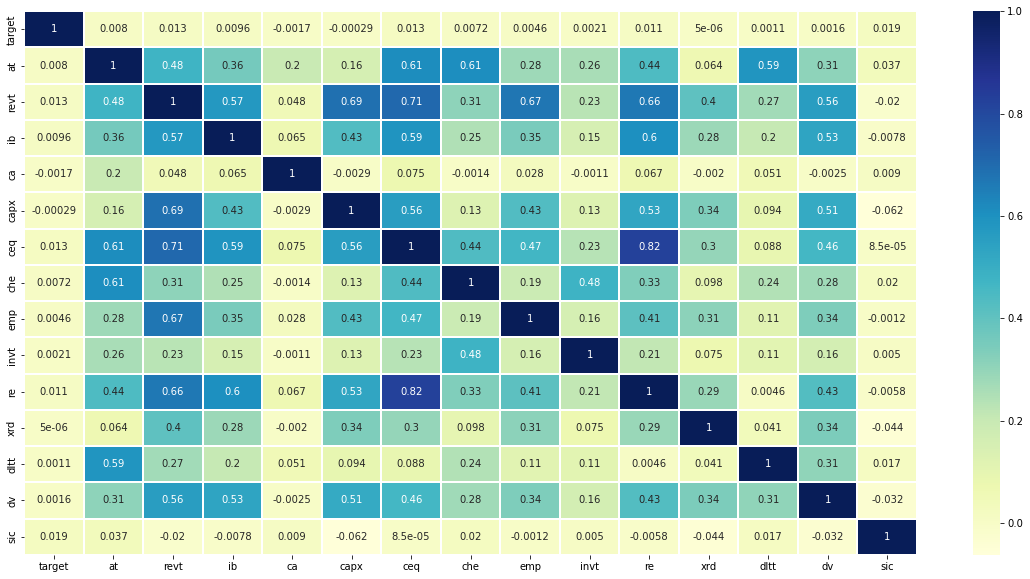

In [12]:
fig, ax = plt.subplots(figsize=(20,10))  
sns.heatmap(finance_features.corr(), cmap="YlGnBu", linewidths=0.1, annot=True, ax=ax)

In [13]:
# sns.pairplot(finance_features, hue='target', height=2.5)

# Train Test Split of Data

In [14]:
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(finance_features, finance_features['target'], test_size=0.3,random_state=100)

In [15]:
unique, counts = np.unique(X_train['target'], return_counts=True)
dict(zip(unique, counts))

{0.0: 156202, 1.0: 1305}

In [16]:
unique, counts = np.unique(X_test['target'], return_counts=True)
dict(zip(unique, counts))

{0.0: 66947, 1.0: 556}

## SVM

#### Training SVM Model

In [17]:
# from sklearn import svm

In [18]:
# sampleN = int(len(X_train)*0.05)
# sampleN

In [19]:
# # SVM takes time to train, hence taking 5% sample of the training data to train the model

# sample_X = X_train.sample(sampleN)
# sample_y = sample_X['target']

In [20]:
# clf = svm.SVC(kernel='linear')

In [21]:
# # Taking too much time
# # clf.fit(X_train, y_train)

# clf.fit(sample_X,sample_y)

In [22]:
# import findspark
# findspark.init()

# import pyspark
# import random

# sc = pyspark.SparkContext(appName="svc")

# sc.parallelize(clf.fit(X_train,y_train))

# sc.stop()

# y_pred = clf.predict(X_test)

# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#### Predicting Target with SVM

In [23]:
# y_pred_svm = clf.predict(X_test)

In [24]:
# unique, counts = np.unique(y_pred_svm, return_counts=True)
# dict(zip(unique, counts))

#### Metric Calculations for SVM

In [25]:
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))

In [26]:
# print("Precision:",metrics.precision_score(y_test, y_pred_svm))

In [27]:
# print("Recall:",metrics.recall_score(y_test, y_pred_svm))

In [28]:
# cm_svm = metrics.confusion_matrix(y_test, y_pred_svm)
# print(cm_svm)

In [29]:
# group_names = ['True Pos','False Neg','False Pos','True Neg']

# group_counts = ["{0:0.0f}".format(value) for value in cm_svm.flatten()]

# group_percentages = ["{0:.2%}".format(value) for value in cm_svm.flatten()/np.sum(cm_svm)]

# labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
# labels = np.asarray(labels).reshape(2,2)

# sns.heatmap(cm_svm, annot=labels, fmt='', cmap='icefire')

In [30]:
# ax= plt.subplot()

# # annot=True to annotate cells, ftm='g' to disable scientific notation
# sns.heatmap(cm_svm, annot=True, fmt='g', ax=ax, cmap='Set2');  

# # labels, title and ticks
# ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
# ax.set_title('Confusion Matrix'); 
# ax.xaxis.set_ticklabels(['not aquired', 'acquired']); ax.yaxis.set_ticklabels(['not acquired', 'acquired']);

## Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
logisticRegr = LogisticRegression()

#### Training Logistic Regression Model

In [33]:
logisticRegr.fit(X_train, y_train)

C:\Users\Sheetal\anaconda3\envs\cs549\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Predicting Target with Logistic Regression

In [34]:
y_pred_lr = logisticRegr.predict(X_test)

#### Metric Calculation for Logistic Regression

In [35]:
unique, counts = np.unique(y_pred_lr, return_counts=True)
dict(zip(unique, counts))

{0.0: 67493, 1.0: 10}

In [36]:
lrScore = logisticRegr.score(X_test, y_test)
print(lrScore)

0.9916151874731494


In [37]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lr))

Accuracy: 0.9916151874731494


In [38]:
print("Precision:",metrics.precision_score(y_test, y_pred_lr))

Precision: 0.0


In [39]:
print("Recall:",metrics.recall_score(y_test, y_pred_lr))

Recall: 0.0


In [40]:
cm_lr= metrics.confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

[[66937    10]
 [  556     0]]


<AxesSubplot:>

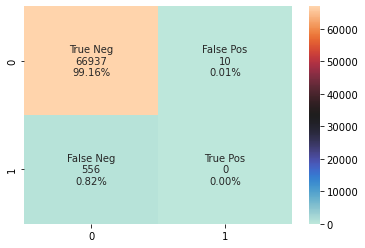

In [41]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in cm_lr.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm_lr.flatten()/np.sum(cm_lr)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm_lr, annot=labels, fmt='', cmap='icefire')

In [42]:
# ax= plt.subplot()

# # annot=True to annotate cells, ftm='g' to disable scientific notation
# sns.heatmap(cm_lr, annot=True, fmt='g', ax=ax, cmap='Set2');  

# # labels, title and ticks
# ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
# ax.set_title('Confusion Matrix'); 
# ax.xaxis.set_ticklabels(['not aquired', 'acquired']); ax.yaxis.set_ticklabels(['not acquired', 'acquired']);

## Feed Forward NN 

In [43]:
import tensorflow as tf

In [65]:
y = finance_features['target'].values
X = finance_features.iloc[:,1:].values

In [66]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(157507, 15)
(157507, 1)
(67503, 15)
(67503, 1)


In [51]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(157507, 15)
(157507, 1)
(67503, 15)
(67503, 1)


In [67]:
learningRate = 0.01
trainingEpochs = 10
n_classes= 1

cost_history = np.empty(shape=[1],dtype=float)

In [68]:
tf.compat.v1.disable_eager_execution()

In [69]:
x = tf.compat.v1.placeholder(tf.float32,[None, 15])
W = tf.Variable(tf.zeros([15,n_classes]))
b = tf.Variable(tf.zeros([n_classes]))

In [70]:
init = tf.compat.v1.global_variables_initializer()

In [71]:
y = tf.compat.v1.placeholder(tf.float32,[None, n_classes])

In [72]:
pred = tf.nn.softmax(tf.matmul(x,W)+b)

In [73]:
cost_function = tf.reduce_mean(-tf.reduce_sum((y*tf.math.log(pred))))

In [74]:
training_step = tf.compat.v1.train.GradientDescentOptimizer(learningRate).minimize(cost_function)

In [75]:
sess= tf.compat.v1.Session()
sess.run(init)
mse_history = []

In [76]:
for i in range(10):
    sess.run(training_step,feed_dict=({x:X_train, y: y_train}))
    cost = sess.run(cost_function, feed_dict={x: X_train, y : y_train})
    cost_history = np.append(cost_history,cost)
    
    pred_y = sess.run(pred, feed_dict={x:X_test})
    print("Epoch: ",i," Cost:",cost)
    
    mse = tf.reduce_mean(tf.square(pred_y - y_test))
    mse_history.append(sess.run(mse))

Epoch:  0  Cost: -0.0
Epoch:  1  Cost: -0.0
Epoch:  2  Cost: -0.0
Epoch:  3  Cost: -0.0
Epoch:  4  Cost: -0.0
Epoch:  5  Cost: -0.0
Epoch:  6  Cost: -0.0
Epoch:  7  Cost: -0.0
Epoch:  8  Cost: -0.0
Epoch:  9  Cost: -0.0


In [77]:
correct_prediction = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy: ",(sess.run(accuracy, feed_dict={x: X_test, y: y_test})))

Accuracy:  1.0
